<a href="https://colab.research.google.com/github/Thato-pixel/iris-classification/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('spam.csv',encoding='latin')

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# New Section

In [ ]:
#data cleaning

In [ ]:
df.info

<bound method DataFrame.info of       message_type                                            message  \
0                0  Go until jurong point, crazy.. Available only ...   
1                0                      Ok lar... Joking wif u oni...   
2                1  Free entry in 2 a wkly comp to win FA Cup fina...   
3                0  U dun say so early hor... U c already then say...   
4                0  Nah I don't think he goes to usf, he lives aro...   
...            ...                                                ...   
5567             1  This is the 2nd time we have tried 2 contact u...   
5568             0              Will Ì_ b going to esplanade fr home?   
5569             0  Pity, * was in mood for that. So...any other s...   
5570             0  The guy did some bitching but I acted like i'd...   
5571             0                         Rofl. Its true to its name   

     Unnamed: 4  num_characters  num_words  num_sentences  
0           NaN             111         24              2  
1           NaN              29          8              2  
2           NaN             155         37              2  
3           NaN              49         13              1  
4           NaN              61         15              1  
...         ...             ...        ...            ...  
5567        NaN             161         35              4  
5568        NaN              37          9              1  
5569        NaN              57         15              2  
5570        NaN             125         27              1  
5571        NaN              26          7              2  

[5169 rows x 6 columns]>

In [ ]:
df.describe()

,v1,v2,Unnamed: 4
count,5572,5572,6
unique,2,5169,5
top,ham,"Sorry, I'll call later","GNT:-)"""
freq,4825,30,2


In [ ]:
#drop unnecessary columns
df.rename(columns={'v1':'message_type','v2':'message'},inplace=True)
df.sample(5)

,message_type,message,Unnamed: 4
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,NaN
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...,NaN
429,ham,I wnt to buy a BMW car urgently..its vry urgen...,NaN
331,ham,Maybe i could get book out tomo then return it...,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

4644    0
2572    0
4719    0
2132    1
2556    0
Name: message_type, dtype: int64

In [ ]:
df[df['message_type']==1]

,message_type,message,Unnamed: 4,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,148,39,4
8,1,WINNER!! As a valued network customer you have...,NaN,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,NaN,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,136,31,3
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,147,30,1


In [ ]:
#check missing values
df.isnull().sum()
df.duplicated().sum()

403

In [ ]:
#we dropping duplicates
df=df.drop_duplicates()

In [ ]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

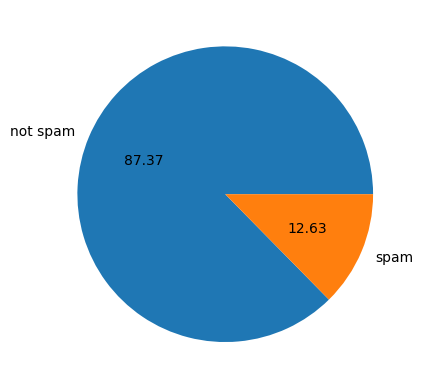

In [ ]:
plt.pie(df['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#new characters
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['message'].apply(len)
df.head()

<ipython-input-34-e1ccf2500ea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


,message_type,message,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61


In [ ]:
#number of words
from nltk.tokenize import word_tokenize
df['message'].apply((lambda x: nltk.word_tokenize(x)))
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)


<ipython-input-37-55017f75fc0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


,message_type,message,Unnamed: 4,num_characters,num_words
5479,0,Really do hope the work doesnt get stressful. ...,NaN,61,14
2357,0,Okay same with me. Well thanks for the clarifi...,NaN,52,10
4822,0,:-) :-),NaN,7,6
1285,0,"Just wondering, the others just took off",NaN,40,8
1829,1,Hottest pics straight to your phone!! See me g...,NaN,151,32


In [ ]:
#number of sentences
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


<ipython-input-38-179d970ea690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
#ham messages
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam messages
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

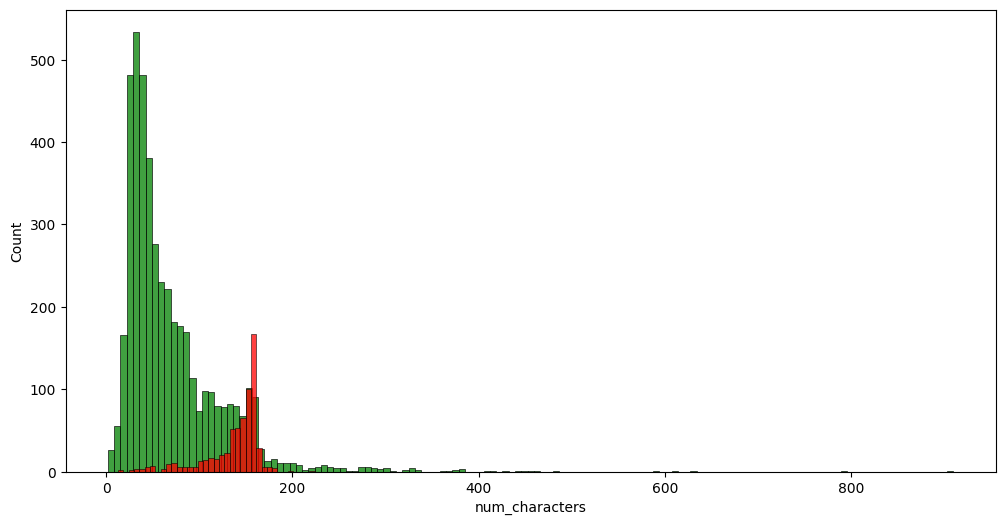

In [ ]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

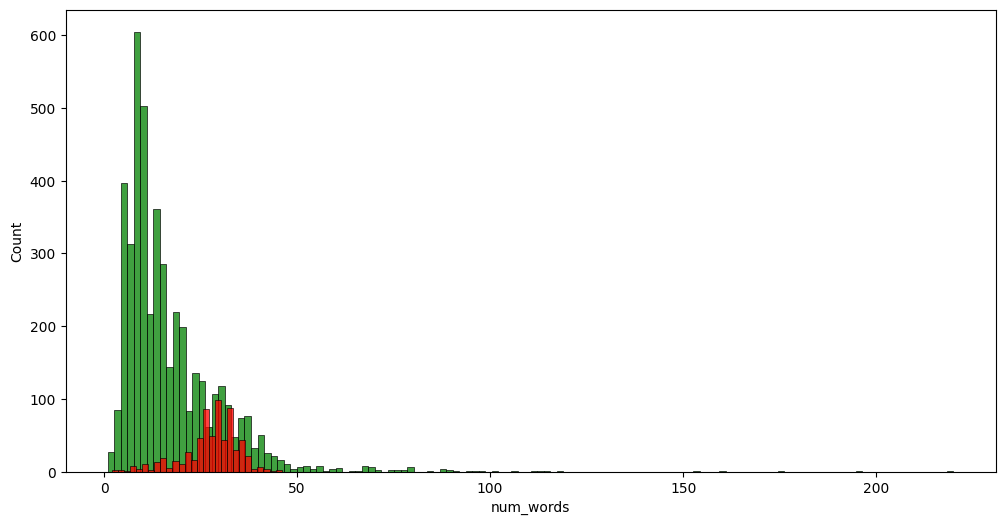

In [ ]:
#words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

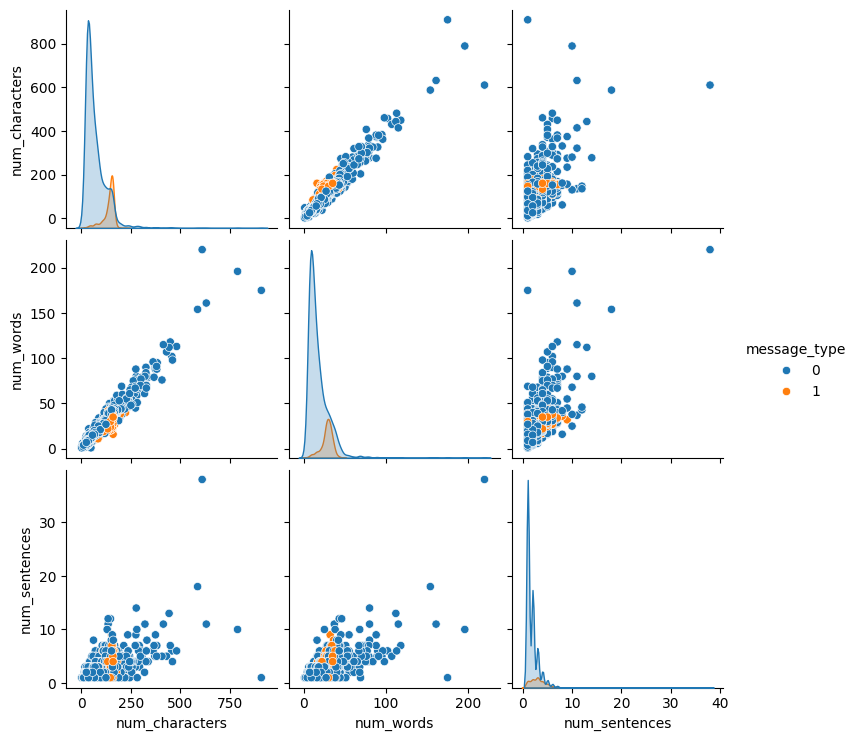

In [ ]:
sns.pairplot(df,hue='message_type')

In [ ]:
#remove stop words and panctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
ps=PorterStemmer()

In [ ]:
#text transform
def text_transform(message):
  message=message.lower() #change to lowercase
  message=nltk.word_tokenize(message) #tokenization
  y=[]
  for i in message:
    if i.isalnum():
      y.append(i)
      #Moved y.clear() outside the loop to retain collected alphanumeric words
      y.clear()
      #for checking punctuation and stopwords
      for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
          message=y[:]
          y.clear()

          #for stemming
          for i in message:
            y.append(ps.stem(i))
            #Returning th processed words as a space-separated string
            return "".join(y)




In [ ]:
df['transformed_message']=df['message'].apply(text_transform)

<ipython-input-54-1c247b09fe9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_message']=df['message'].apply(text_transform)


In [ ]:
#word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
df['transformed_message']=df['message'].apply(text_transform)

<ipython-input-68-1c247b09fe9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_message']=df['message'].apply(text_transform)
